In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(2)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80


In [3]:
pokemon.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object')

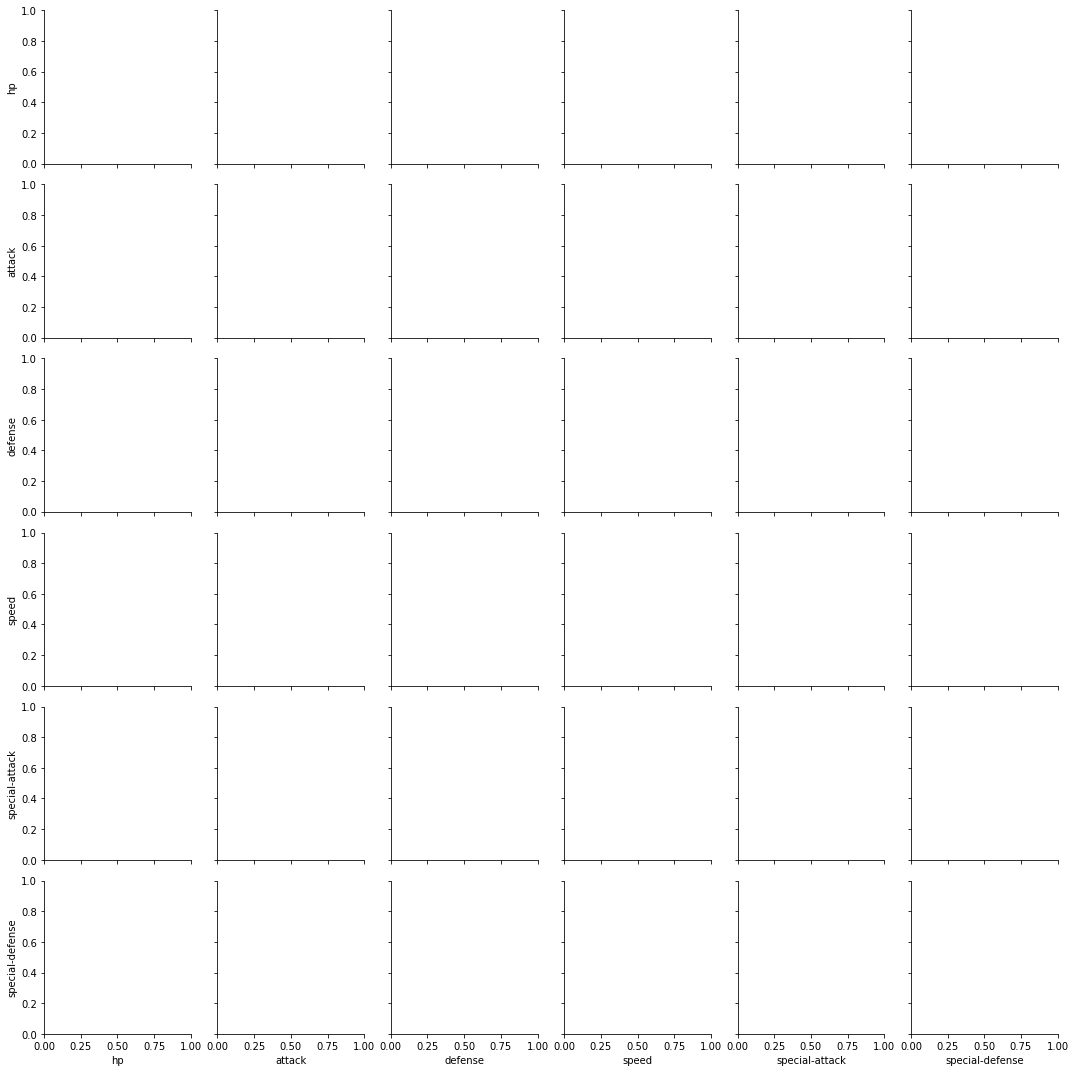

In [4]:
#lets consider we are interested in seeing pairwise relationship between last 6 columns of pokemon 
#from hp tp special-defense

#instead of plotting scatterplot one by one, we can do it together by using plot matrices
#we can use sb.PairGrid()

#before plotting we create the list of interested parameters using a list

interested_columns = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']

#now we pass the created list in vars parameter while plotting plot matrices
g = sb.PairGrid(data = pokemon, vars=interested_columns)
#If vars is not specified then all the variables in dataset will be plotted

#even with 6 variables, plot matrix can take a lot of space 
#now comes plotting graphs

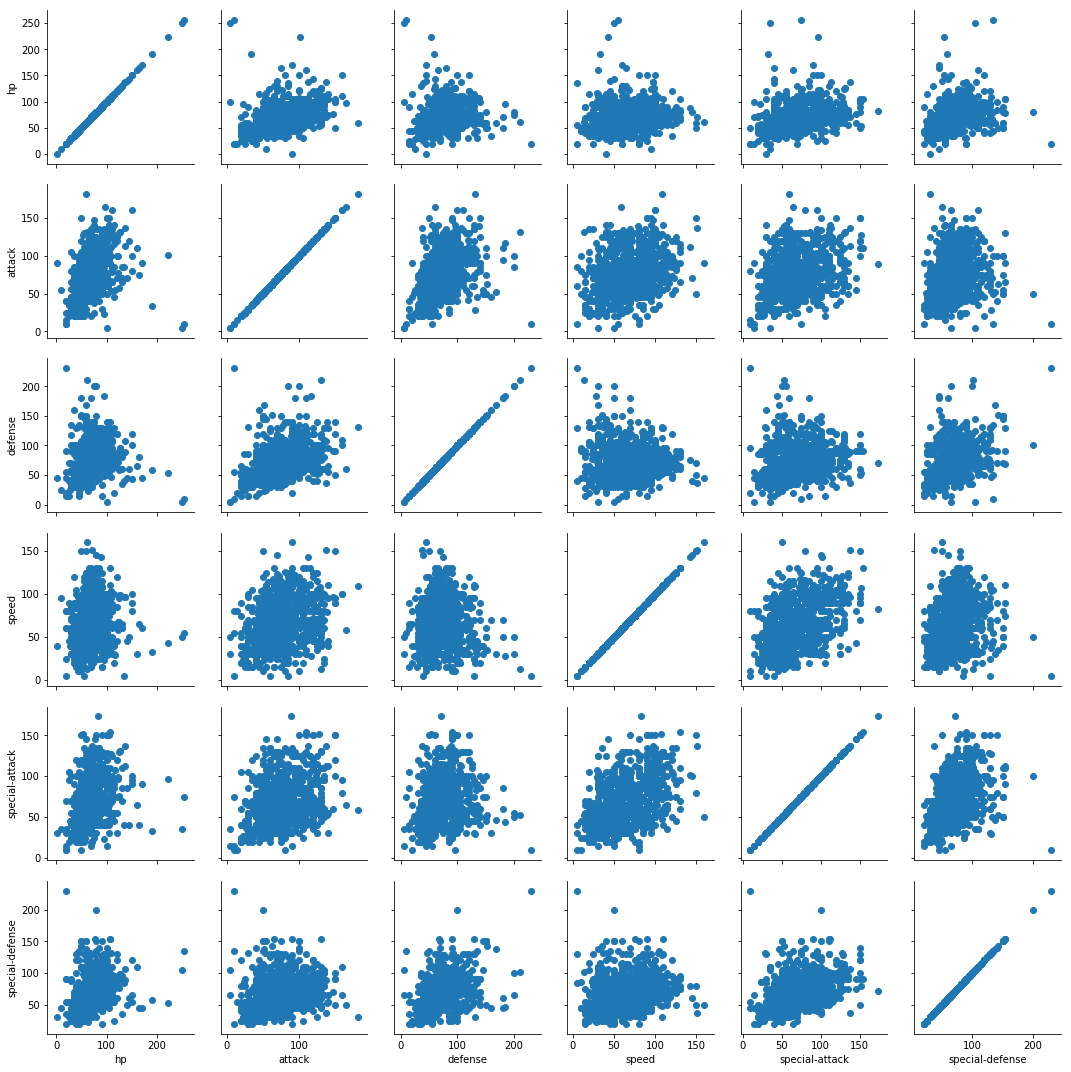

In [6]:
#as all the columns are numeric we can use scatter plot
g = sb.PairGrid(data = pokemon, vars=interested_columns)
g.map(plt.scatter)

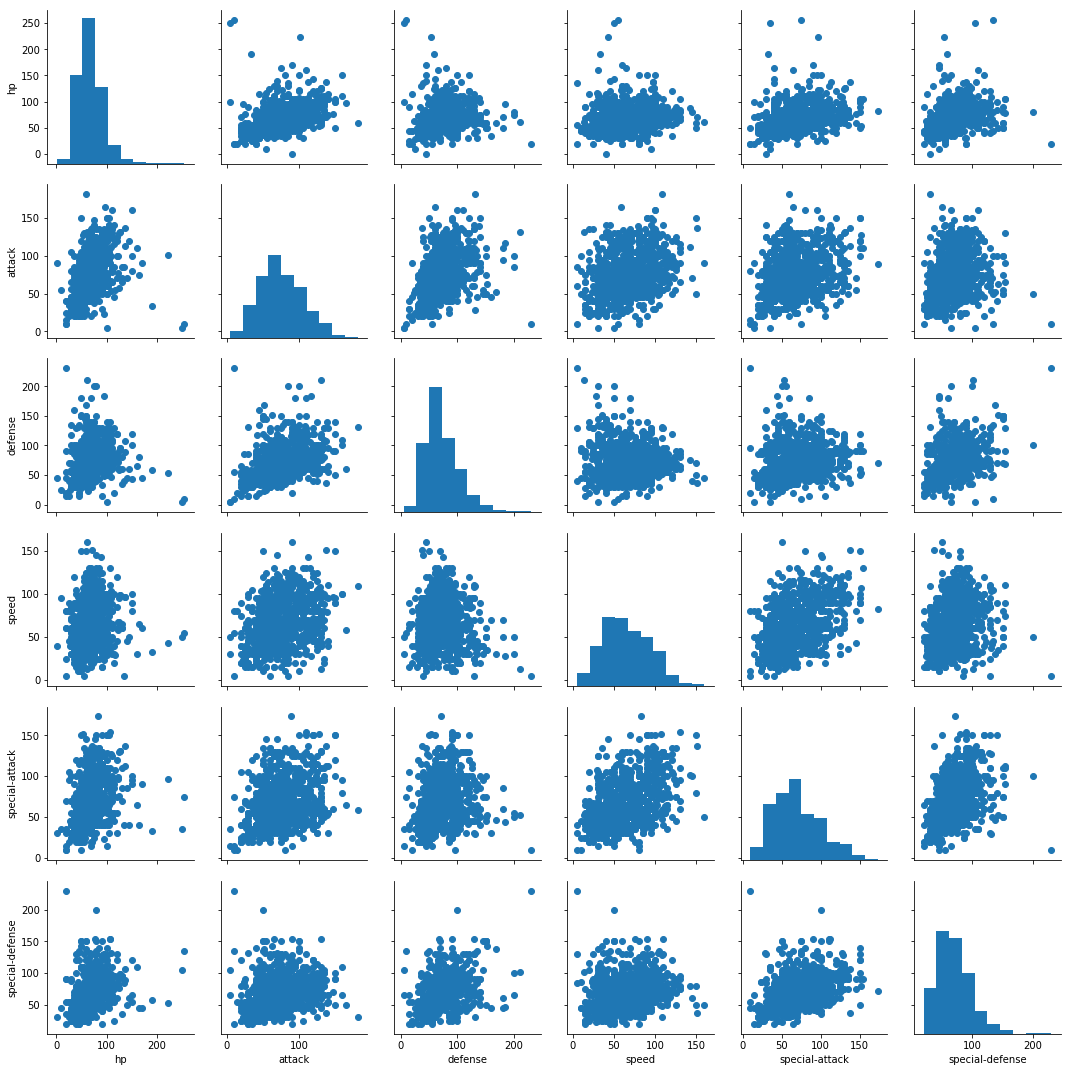

In [8]:
#you can see diagnols on the cols where the column is mapped against itself
#you can plot histograms on diagnols as follows

g = sb.PairGrid(data = pokemon, vars=interested_columns)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

In [9]:
#lets see the correlation by mapping these columns in correlation heatmap
#corr() returns matrix of pairwise correlation between 2 elements
#putting that correlation into the heat map creates our desired heat map

print(pokemon[interested_columns].corr())

                       hp    attack   defense     speed  special-attack  \
hp               1.000000  0.433318  0.231540  0.169512        0.377446   
attack           0.433318  1.000000  0.435514  0.335289        0.325937   
defense          0.231540  0.435514  1.000000 -0.023866        0.199560   
speed            0.169512  0.335289 -0.023866  1.000000        0.440411   
special-attack   0.377446  0.325937  0.199560  0.440411        1.000000   
special-defense  0.367949  0.202138  0.508688  0.202847        0.481345   

                 special-defense  
hp                      0.367949  
attack                  0.202138  
defense                 0.508688  
speed                   0.202847  
special-attack          0.481345  
special-defense         1.000000  


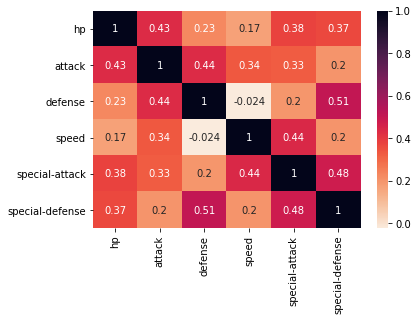

In [11]:
#creating heatmap using correlation()

sb.heatmap(pokemon[interested_columns].corr(), cmap='rocket_r', annot=True)
#annot=True will show numbers

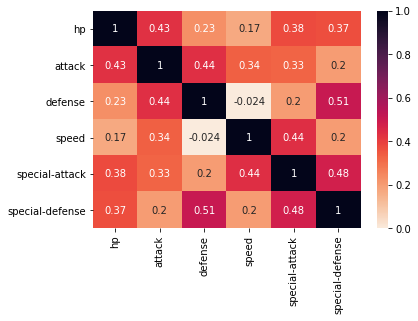

In [12]:
#seems like there is only one negative relation
#add vmin to set the lowerbound of heatmap to 0
sb.heatmap(pokemon[interested_columns].corr(), cmap='rocket_r', annot=True, vmin=0)

In [13]:
#the plot shows that there is a higher correlation between defense and special-defense
#if you see the scatter plot that higher correlation is due to that outlier
#this means that you should do further analysis on that by diving deeper

In [14]:
#for feature engineering you need to create new variables by applying functions on existing variables
#example finding prevalence of tuberculosis per 100,000 population using total population and prevalence

Text(0,0.5,'Defensive bias (physical/special)')

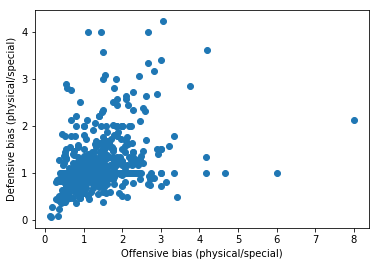

In [16]:
#creating new column attack_ratio which is a ratio between attack and special attack
pokemon['attack_ratio'] = pokemon['attack'] / pokemon['special-attack']
#if a pokemon has value greater than 1 then they favor the physical size
#if the value is less than 1 then they favor special size

#the same is applied for defense statistics
pokemon['defense_ratio'] = pokemon['defense'] / pokemon['special-defense']

#checking pokemon dataset
pokemon.head(5) #new columns are added

#plotting scatter plot for both the newly created variables
plt.scatter(data=pokemon, x='attack_ratio', y="defense_ratio")

#giving labels
plt.xlabel('Offensive bias (physical/special)')
plt.ylabel('Defensive bias (physical/special)')

#the basic scatter plot loks likes this

([<matplotlib.axis.YTick at 0x1a280dec88>,
 <a list of 7 Text yticklabel objects>)

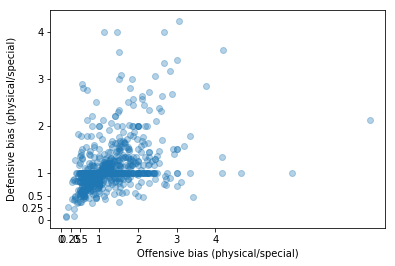

In [27]:
#lets polish by adding transparency and changing scales to log scales
plt.scatter(data=pokemon, x='attack_ratio', y="defense_ratio", alpha=1/3)
plt.xlabel('Offensive bias (physical/special)')
plt.ylabel('Defensive bias (physical/special)')
plt.xscale=('log')
plt.yscale=('log')
tick_location = [0, 0.25, 0.5, 1, 2, 3, 4]
plt.xticks(tick_location, tick_location)
plt.yticks(tick_location, tick_location)

#the gap between my axis values is not same.. why?
#it's correct as the gap between 1 and 2 should be double of 2 and 4

(0.1767766952966369, 5.656854249492381)

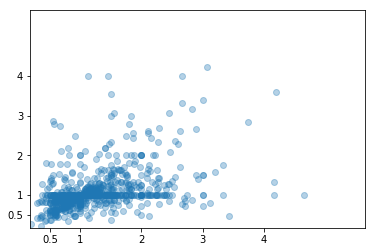

In [32]:
#finally setting axis limits to remove the outliers

plt.scatter(data=pokemon, x='attack_ratio', y="defense_ratio", alpha=1/3)
plt.xscale=('log')
plt.yscale=('log')
tick_location = [-0.5, -0.25, 0, 0.5, 1, 2, 3, 4]
plt.xticks(tick_location, tick_location)
plt.yticks(tick_location, tick_location)
plt.xlim(2**-2.5, 2**2.5)
plt.ylim(2**-2.5, 2**2.5)

#in right hand quadrant we have pokemons those are physical biased in both offense and defense
#in lower left hand quadrant we have pokemons those are special biased in both offense and defense
#there are lot of pokemons on y=1 line showing they have no defensive bias 
#and have a wide range of offensive biasis
#there are few pokemons on x=1 line showing offensive bias